# Stratified GridSearchCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór danych zawierającego zdjęcia twarzy.

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(image_shape)

(87, 65)


Narysujmy kilka zdjęć oraz ich etykiety.

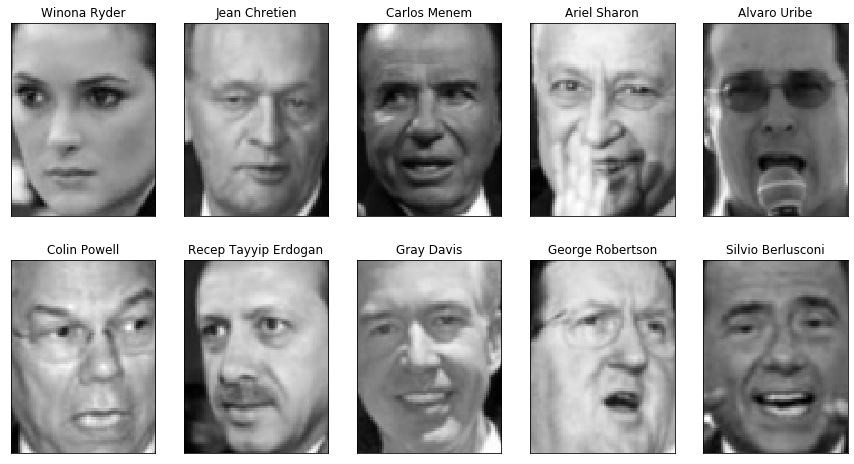

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=plt.cm.gist_gray)
    ax.set_title(people.target_names[target])
plt.show() 

In [5]:
people.images[0]

array([[ 57.      ,  60.333332,  78.      , ...,  40.666668,  36.666668,
         34.      ],
       [ 52.666668,  60.      ,  92.      , ...,  46.666668,  36.      ,
         30.      ],
       [ 46.      ,  66.      , 113.333336, ...,  51.      ,  43.333332,
         37.666668],
       ...,
       [ 61.      ,  62.666668,  62.333332, ...,  19.      ,  18.333334,
         18.666666],
       [ 62.666668,  64.666664,  67.      , ...,  17.333334,  18.      ,
         22.333334],
       [ 65.333336,  68.      ,  67.      , ...,  17.333334,  16.666666,
         22.666666]], dtype=float32)

In [6]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [7]:
X = people.data
# X = X/255.
n_features = X.shape[1]

# the label to predict is the id of the person
y = people.target
target_names = people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_features: 5655
n_classes: 62


In [8]:
print(y)

[61 25  9 ... 14 15 14]


Podzielmy zbiór na część testową i treningową .

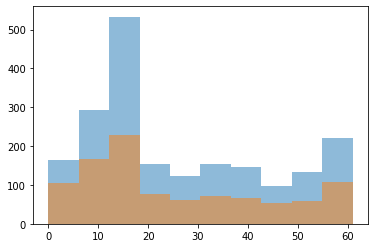

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* BaggingClassifier


```python
param_grid = {'n_estimators': [10,20,50,100],
              'max_samples': [10,20],
              'max_features': [10,20],
             }
```             

In [10]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = {'n_estimators': [10,20,50,100],
              'max_samples': [10,20],
              'max_features': [100],
              'base_estimator__max_depth':[10, 20]
             }

grid_1 = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), 
                      param_grid, 
                      cv=kfold, 
                      return_train_score=True,
                      verbose = 1)

grid_1.fit(X_train, y_train)
grid_1.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   33.7s finished


{'base_estimator__max_depth': 20,
 'max_features': 100,
 'max_samples': 20,
 'n_estimators': 50}

In [46]:
grid_1.estimator.get_params().keys()
print(grid_1.estimator.get_params()['base_estimator__min_samples_leaf'])
print(grid_1.estimator.get_params()['max_features'])

1
1.0


In [40]:
from sklearn.decomposition import PCA
print(X_train.shape)
pca = PCA(n_components=20, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
print(X_train_pca.shape)


(2025, 5655)
(2025, 20)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', PCA(n_components=20, whiten=True)), ('classifier', LinearSVC(C=1))])

param_grid_2 = {
            'classifier__C': [0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_2 = GridSearchCV(pipe, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

In [27]:
from sklearn.tree import DecisionTreeClassifier

pipe_3 = Pipeline([('preprocessing', PCA(n_components=20, whiten=True)), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_3 = {
            'classifier__max_depth': [5,10,20],
            'classifier__min_samples_split': [2,5,10,30],
            'classifier__max_leaf_nodes': [5,10,15,40]
}


grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 15,
 'classifier__min_samples_split': 5}

In [30]:
from sklearn.neighbors import KNeighborsClassifier

pipe_4 = Pipeline([('preprocessing', PCA(n_components=20, whiten=True)), 
                   ('classifier', KNeighborsClassifier(n_neighbors=2, metric='euclidean'))])

param_grid_4 = {
            'classifier__n_neighbors': [2, 5, 10, 11,12],
            'classifier__metric': ['euclidean', 'cityblock', 'cosine']
}


grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__metric': 'cosine', 'classifier__n_neighbors': 12}

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', PCA(n_components=20, whiten=True)), ('classifier', SVC(C=1))])

param_grid_5 = {
            'classifier__C': [ 0.01, 0.1, 1, 10, 100],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_5 = GridSearchCV(pipe, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__C': 10, 'classifier__gamma': 0.01}

In [40]:
from sklearn import  metrics


models = []
models.append(('Bagging', grid_1.best_estimator_))
models.append(('LinearSVC', grid_2.best_estimator_))
models.append(('DecisionTreeClassifier', grid_3.best_estimator_))
models.append(('KNeighborsClassifier', grid_4.best_estimator_))
models.append(('SVC', grid_5.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='weighted'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='weighted'))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test), average='weighted'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

Bagging
precision_score: 0.10063416877044132
recall_score: 0.16733466933867736


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_score: 0.06151629286210834
accuracy_score: 0.16733466933867736
LinearSVC
precision_score: 0.2869010349561382
recall_score: 0.3256513026052104
f1_score: 0.2615127994883294
accuracy_score: 0.3256513026052104
DecisionTreeClassifier
precision_score: 0.08077384821267324
recall_score: 0.1743486973947896
f1_score: 0.09645123408068397
accuracy_score: 0.1743486973947896
KNeighborsClassifier
precision_score: 0.2877158642720203
recall_score: 0.3366733466933868
f1_score: 0.2800056766907826
accuracy_score: 0.3366733466933868
SVC
precision_score: 0.38750030475503555
recall_score: 0.4168336673346693
f1_score: 0.37454309658680646
accuracy_score: 0.4168336673346693


In [42]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['Bagging', 'LinearSVC','DecisionTreeClassifier','KNeighborsClassifier','SVC rbf'])
df

,Method,accuracy_score,f1_score,precision_score,recall_score
0,Bagging,0.167335,0.061516,0.100634,0.167335
1,LinearSVC,0.325651,0.261513,0.286901,0.325651
2,DecisionTreeClassifier,0.174349,0.096451,0.080774,0.174349
3,KNeighborsClassifier,0.336673,0.280006,0.287716,0.336673
4,SVC rbf,0.416834,0.374543,0.387500,0.416834
